# Advent of Code 2023
## Day 10
*<https://adventofcode.com/2023/day/10>*

In [1]:
import heapq
import math
import re
import functools as ft
from collections import Counter, defaultdict, deque, namedtuple
from itertools import combinations, permutations, product
from string import ascii_letters, ascii_lowercase, ascii_uppercase

import IPython
import z3
from rich import inspect, pretty, print

from new_helper import *

pretty.install()

In [2]:
DAY = 10
input_str = get_aoc_input(DAY, 2023)
part_1 = part_2 = 0

In [3]:
inp = input_str.parse_grid()

In [4]:
start = inp.get_pos("S")

dirs = {
    "N": (0, -1),
    "S": (0, 1),
    "E": (1, 0),
    "W": (-1, 0),
}

syms = {
    "-": ["W", "E"],
    "|": ["N", "S"],
    "L": ["N", "E"],
    "J": ["N", "W"],
    "F": ["S", "E"],
    "7": ["S", "W"],
}

opp = {
    "N": "S",
    "S": "N",
    "E": "W",
    "W": "E",
}

In [5]:
def add_dir(p: tuple[int, int], d: str) -> tuple[int, int]:
    return p[0] + dirs[d][0], p[1] + dirs[d][1]


def test_loop(g: Grid[str], start: tuple[int, int]) -> list[tuple[int, int]]:
    loop = [start]
    seen = set()
    cur = (start, opp[syms[g[start][0]][0]])

    while True:
        if not g.in_bounds(*cur[0]):
            return []

        if g[cur[0]] == ".":
            return []

        ns = syms[g[cur[0]]].copy()
        if opp[cur[1]] not in ns:
            return []

        ns.remove(opp[cur[1]])

        cur = (add_dir(cur[0], ns[0]), ns.pop())

        if cur[0] == start:
            return loop if cur[1] == opp[syms[g[start][0]][0]] else []

        if cur[0] in seen:
            return []

        seen.add(cur[0])
        loop.append(cur[0])

In [6]:
for s in syms.keys():
    inp[start] = s
    if l := test_loop(inp, start):
        part_1 = len(l) // 2
        break

In [7]:
l = set(l)

for y, r in enumerate(inp.rows()):
    i = False
    for x, c in enumerate(r):
        if (x, y) in l and c in "|7F":
            i = not i
        if (x, y) not in l:
            part_2 += i

In [8]:
print_part_1(part_1)
print_part_2(part_2)

Part 1: 6820

Part 2: 337

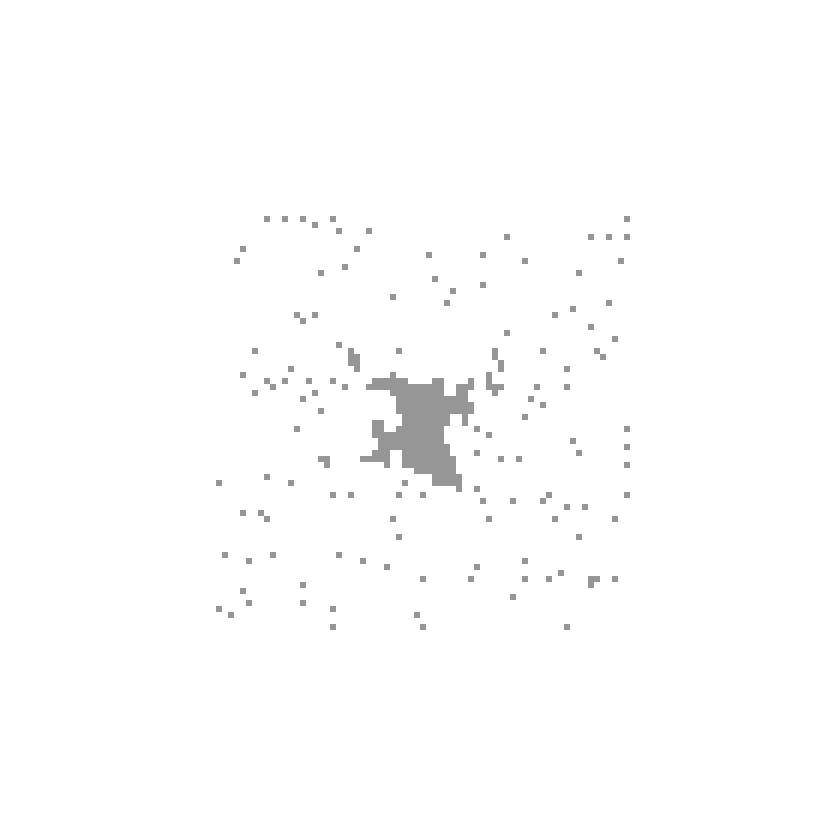

In [9]:
ps = {
    ".": [
        "...",
        "...",
        "...",
    ],
    "-": [
        "...",
        "###",
        "...",
    ],
    "|": [
        ".#.",
        ".#.",
        ".#.",
    ],
    "L": [
        ".#.",
        ".##",
        "...",
    ],
    "J": [
        ".#.",
        "##.",
        "...",
    ],
    "F": [
        "...",
        ".##",
        ".#.",
    ],
    "7": [
        "...",
        "##.",
        ".#.",
    ],
}

from PIL import Image

im = Image.new("LA", (inp.width * 3, inp.height * 3))

contained = set()

for y, r in enumerate(inp.rows()):
    i = False
    for x, c in enumerate(r):
        if (x, y) in l and c in "|7F":
            i = not i
        if (x, y) not in l and i:
            contained.add((x, y))

for y, r in enumerate(inp.rows()):
    for x, c in enumerate(r):
        s = c if (x, y) in l else "."
        p = ps[s]
        for dy, r in enumerate(p):
            for dx, c in enumerate(r):
                im.putpixel((x * 3 + dx, y * 3 + dy), (255, 255) if c == "#" else (150, 255) if (x, y) in contained else (0, 0))

im.resize((im.size[0] * 2, im.size[1] * 2), Image.NEAREST)